## **Digital Assignment**
### **21BDS0144 <br> Shrijeet Maiti**
#### BCSE331L <br> 24.09.24
Dataset used: https://raw.githubusercontent.com/salemprakash/EDA/main/Data/catholic.csv

##### **Loading and Exploring the Dataset**

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/catholic.csv'
data = pd.read_csv(url)

dimensions = data.shape
print("dimensions:", dimensions)

summary = data.describe()
print("\nsummary statistics:\n", summary)

data_types = data.dtypes
print("\ndata types:\n", data_types)

dimensions: (7430, 14)

summary statistics:
           rownames            id       read12       math12       female  \
count  7430.000000  7.430000e+03  7430.000000  7430.000000  7430.000000   
mean   3715.500000  4.589838e+06    51.772402    52.133623     0.517362   
std    2145.000583  2.744467e+06     9.407761     9.459117     0.499732   
min       1.000000  1.249020e+05    29.150000    29.500000     0.000000   
25%    1858.250000  2.424049e+06    44.525000    45.020000     0.000000   
50%    3715.500000  4.592442e+06    53.080000    52.530000     1.000000   
75%    5572.750000  7.241106e+06    59.470000    59.857500     1.000000   
max    7430.000000  7.979086e+06    68.090000    71.370000     1.000000   

             asian       hispan        black     motheduc     fatheduc  \
count  7430.000000  7430.000000  7430.000000  7430.000000  7430.000000   
mean      0.051682     0.103499     0.070659    13.356864    13.674159   
std       0.221400     0.304630     0.256272     2.005982

##### **Module 2**

##### 1. Merging Data
- on = 'id' indicates that the merge should happen based on the id column.
- how = 'inner' performs an inner join, meaning only rows with matching ids in both datasets will be included.

In [2]:
# creating a sample second dataset to merge with the original one
data2 = pd.DataFrame({
    'id': [124902, 124915, 124916],
    'additional_info': ['info1', 'info2', 'info3']
})

merged_data = pd.merge(data, data2, on = 'id', how = 'inner')
merged_data

,rownames,id,read12,math12,female,asian,hispan,black,motheduc,fatheduc,lfaminc,hsgrad,cathhs,parcath,additional_info
0,1,124902,61.41,49.77,0,0,0,0,14.0,12.0,10.30895,1.0,0,1,info1
1,2,124915,58.34,59.84,0,0,0,0,14.0,14.0,10.30895,1.0,0,1,info2
2,3,124916,59.33,50.38,1,0,0,0,14.0,11.0,10.30895,1.0,0,1,info3


##### 2. Reshaping with Hierarchial Indexing
using set_index to create a hierarchical index, combining the id and female columns.

In [3]:
hierarchical_data = data.set_index(['id', 'female'])
hierarchical_data.head()

,,rownames,read12,math12,asian,hispan,black,motheduc,fatheduc,lfaminc,hsgrad,cathhs,parcath
id,female,,,,,,,,,,,,
124902,0,1,61.41,49.77,0,0,0,14.0,12.0,10.30895,1.0,0,1
124915,0,2,58.34,59.84,0,0,0,14.0,14.0,10.30895,1.0,0,1
124916,1,3,59.33,50.38,0,0,0,14.0,11.0,10.30895,1.0,0,1
124932,1,4,49.59,45.03,0,0,0,12.0,14.0,10.30895,1.0,0,1
124944,1,5,57.62,54.26,0,0,0,12.0,12.0,10.65726,1.0,0,1


##### 3. Transformation Techniques <br> (a) Data Deduplication

In [4]:
deduplicated_data = data.drop_duplicates()

# checking for duplicate rows after removal
duplicate_rows = deduplicated_data[data.duplicated()]
duplicate_rows

,rownames,id,read12,math12,female,asian,hispan,black,motheduc,fatheduc,lfaminc,hsgrad,cathhs,parcath


##### (b) Replacing Values

In [5]:
# replacing 0 with None in the 'female' column
replaced_data = data.copy()
replaced_data['female'].replace(0, None, inplace = True)
replaced_data.head()

C:\Users\shrijeet\AppData\Local\Temp\ipykernel_9688\488314721.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  replaced_data['female'].replace(0, None, inplace = True)


,rownames,id,read12,math12,female,asian,hispan,black,motheduc,fatheduc,lfaminc,hsgrad,cathhs,parcath
0,1,124902,61.41,49.77,None,0,0,0,14.0,12.0,10.30895,1.0,0,1
1,2,124915,58.34,59.84,None,0,0,0,14.0,14.0,10.30895,1.0,0,1
2,3,124916,59.33,50.38,1,0,0,0,14.0,11.0,10.30895,1.0,0,1
3,4,124932,49.59,45.03,1,0,0,0,12.0,14.0,10.30895,1.0,0,1
4,5,124944,57.62,54.26,1,0,0,0,12.0,12.0,10.65726,1.0,0,1


##### (c) Handling Missing Values

In [6]:
rows_with_missing_values = data[data.isnull().any(axis = 1)]
rows_with_missing_values

,rownames,id,read12,math12,female,asian,hispan,black,motheduc,fatheduc,lfaminc,hsgrad,cathhs,parcath
26,27,184615,34.19,35.51,0,0,0,0,12.0,12.0,10.021270,NaN,1,1
30,31,700096,48.47,41.75,0,0,1,0,14.0,14.0,8.294049,NaN,0,0
32,33,701125,52.52,48.15,1,0,0,0,16.0,17.0,11.042920,NaN,0,0
34,35,701158,33.87,42.06,1,0,0,1,12.0,17.0,9.433484,NaN,0,0
38,39,701185,53.04,50.10,0,0,0,0,16.0,16.0,10.308950,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7340,7341,7899086,61.93,61.68,1,0,0,0,14.0,17.0,10.657260,NaN,0,0
7341,7342,7899092,64.64,63.00,0,0,0,0,14.0,16.0,10.657260,NaN,0,0
7344,7345,7906123,50.02,37.89,1,0,0,1,12.0,16.0,11.042920,NaN,1,0
7347,7348,7906156,63.29,53.05,1,0,0,1,14.0,14.0,10.308950,NaN,1,0


In [7]:
# counting the number of missing values
missing_values = data.isnull().sum()
missing_values

rownames       0
id             0
read12         0
math12         0
female         0
asian          0
hispan         0
black          0
motheduc       0
fatheduc       0
lfaminc        0
hsgrad      1460
cathhs         0
parcath        0
dtype: int64

##### (d) Dropping Missing Values

In [8]:
dropped_data = data.dropna()

# counting missing values after dropping
missing_values = dropped_data.isnull().sum()
missing_values

rownames    0
id          0
read12      0
math12      0
female      0
asian       0
hispan      0
black       0
motheduc    0
fatheduc    0
lfaminc     0
hsgrad      0
cathhs      0
parcath     0
dtype: int64

##### (e) Filling Missing Values

In [9]:
# 1. specific value
filled_with_zero = data.fillna(0)
filled_rows = filled_with_zero.loc[rows_with_missing_values.index]
print("\nfilled missing values with 0:\n", filled_rows.head())

# 2. forward filling (propagating the previous value forward)
filled_with_ffill = data.fillna(method = 'ffill')
filled_rows = filled_with_ffill.loc[rows_with_missing_values.index]
print("\nfilled missing values using forward fill:\n", filled_rows.head())

# 3. backward filling (propagating the next value backward)
filled_with_bfill = data.fillna(method = 'bfill')
filled_rows = filled_with_bfill.loc[rows_with_missing_values.index]
print("\nfilled missing values using backward fill:\n", filled_rows.head())

# 4. mean of each column
filled_with_mean = data.fillna(data.mean())
filled_rows = filled_with_mean.loc[rows_with_missing_values.index]
print("\nfilled missing values with mean:\n", filled_rows.head())

# 5. median of each column
filled_with_median = data.fillna(data.median())
filled_rows = filled_with_median.loc[rows_with_missing_values.index]
print("\nfilled missing values with median:\n", filled_rows.head())

# 6. mode of each column
filled_with_mode = data.fillna(data.mode().iloc[0])
filled_rows = filled_with_mode.loc[rows_with_missing_values.index]
print("\nfilled missing values with mode:\n", filled_rows.head())


filled missing values with 0:
     rownames      id  read12  math12  female  asian  hispan  black  motheduc  \
26        27  184615   34.19   35.51       0      0       0      0      12.0   
30        31  700096   48.47   41.75       0      0       1      0      14.0   
32        33  701125   52.52   48.15       1      0       0      0      16.0   
34        35  701158   33.87   42.06       1      0       0      1      12.0   
38        39  701185   53.04   50.10       0      0       0      0      16.0   

    fatheduc    lfaminc  hsgrad  cathhs  parcath  
26      12.0  10.021270     0.0       1        1  
30      14.0   8.294049     0.0       0        0  
32      17.0  11.042920     0.0       0        0  
34      17.0   9.433484     0.0       0        0  
38      16.0  10.308950     0.0       0        0  

filled missing values using forward fill:
     rownames      id  read12  math12  female  asian  hispan  black  motheduc  \
26        27  184615   34.19   35.51       0      0      

C:\Users\shrijeet\AppData\Local\Temp\ipykernel_9688\3681448370.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_with_ffill = data.fillna(method = 'ffill')
C:\Users\shrijeet\AppData\Local\Temp\ipykernel_9688\3681448370.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_with_bfill = data.fillna(method = 'bfill')


##### 4. Discretization and Binning
involves converting continuous data into discrete bins.
##### (a) Equal-Width Binning

In [10]:
# discretizing the 'read12' column into 4 equal-width bins
data['read12_bins'] = pd.cut(data['read12'], bins = 4)

print(data[['read12', 'read12_bins']].head())

   read12      read12_bins
0   61.41  (58.355, 68.09]
1   58.34  (48.62, 58.355]
2   59.33  (58.355, 68.09]
3   49.59  (48.62, 58.355]
4   57.62  (48.62, 58.355]


##### (b) Equal-Frequency Binning (Quantile Binning)
creates bins such that each bin has the same number of data points.

In [11]:
# discretizing the 'math12' column into 4 quantile-based bins
data['math12_quantile_bins'] = pd.qcut(data['math12'], q = 4)

print(data[['math12', 'math12_quantile_bins']].head())

   math12 math12_quantile_bins
0   49.77       (45.02, 52.53]
1   59.84      (52.53, 59.858]
2   50.38       (45.02, 52.53]
3   45.03       (45.02, 52.53]
4   54.26      (52.53, 59.858]


##### (c) Custom Binning

In [12]:
# defining custom bin edges for 'lfaminc' (log family income)
bin_edges = [6, 8, 10, 12, 15]
data['lfaminc_custom_bins'] = pd.cut(data['lfaminc'], bins = bin_edges)

print(data[['lfaminc', 'lfaminc_custom_bins']].head())

    lfaminc lfaminc_custom_bins
0  10.30895            (10, 12]
1  10.30895            (10, 12]
2  10.30895            (10, 12]
3  10.30895            (10, 12]
4  10.65726            (10, 12]


##### 5. Outlier Detection and Filtering <br> (a) Z-Score for Outlier Detection
the z-score standardizes values based on the mean and standard deviation. <br> points with a z-score greater than a threshold are considered outliers.

In [13]:
from scipy import stats
import numpy as np

# z-score calculation for 'read12' column
z_scores = np.abs(stats.zscore(data['read12']))

# setting a threshold for outliers
threshold = 2
outliers_zscore = data[z_scores > threshold]

print("outliers based on z-score:\n", outliers_zscore[['read12']])

outliers based on z-score:
       read12
51     29.94
67     32.43
72     31.32
77     30.81
125    31.85
...      ...
7332   31.34
7338   31.38
7350   32.23
7385   31.39
7420   32.16

[193 rows x 1 columns]


##### (b) Interquartile Range (IQR) for Outlier Detection
detects outliers by identifying values that fall outside 1.5 times the IQR above the third quartile or below the first quartile.

In [14]:
# calculating the IQR for the 'math12' column
Q1 = data['math12'].quantile(0.25)
Q3 = data['math12'].quantile(0.75)
IQR = Q3 - Q1

# defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filtering out the outliers
outliers_iqr = data[(data['math12'] < lower_bound) | (data['math12'] > upper_bound)]

print("outliers based on IQR:\n", outliers_iqr[['math12']])

outliers based on IQR:
 Empty DataFrame
Columns: [math12]
Index: []


##### (c) Visualization for Outlier Detection (Box Plot)
graphical method to detect outliers. <br> the box plot visualizes the distribution of the read12 scores. <br> points outside the "whiskers" are typically outliers.

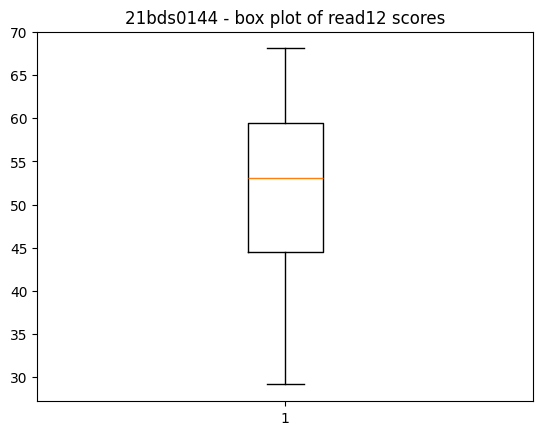

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

plt.boxplot(data['read12'].dropna())
plt.title('21bds0144 - box plot of read12 scores')
plt.show()

##### **Module 3**

##### Univariate Analysis <br> 1. Measures of Central Tendency (math12)

In [16]:
mean_math12 = data['math12'].mean()
median_math12 = data['math12'].median()
mode_math12 = data['math12'].mode()[0]

print("mean:", mean_math12)
print("median:", median_math12)
print("mode:", mode_math12)

mean: 52.133623149394346
median: 52.53
mode: 50.73


##### 2. Measures of Dispersion (math12)

In [17]:
std_math12 = data['math12'].std()
var_math12 = data['math12'].var()

print("standard deviation:", std_math12)
print("variance:", var_math12)

standard deviation: 9.45911737298719
variance: 89.47490147594807


##### 3. Quartiles and IQR (math12)

In [18]:
quantiles_math12 = data['math12'].quantile([0.25, 0.5, 0.75])
iqr_math12 = quantiles_math12[0.75] - quantiles_math12[0.25]

print("quartiles:\n", quantiles_math12)
print("\nIQR:", iqr_math12)

quartiles:
 0.25    45.0200
0.50    52.5300
0.75    59.8575
Name: math12, dtype: float64

IQR: 14.837499999999999


##### 4. Correlation (read12 and math12)

In [19]:
correlation = data['read12'].corr(data['math12'])
print("correlation between read12 and math12:", correlation)

correlation between read12 and math12: 0.7104133663371396


##### 5. Histogram (math12)

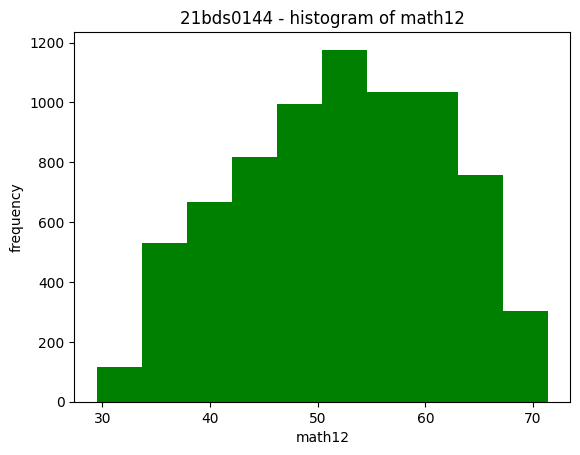

In [20]:
plt.hist(data['math12'], color = 'green', bins = 10)
plt.title("21bds0144 - histogram of math12")
plt.xlabel("math12")
plt.ylabel("frequency")
plt.show()

##### 6. Density Plot (math12)

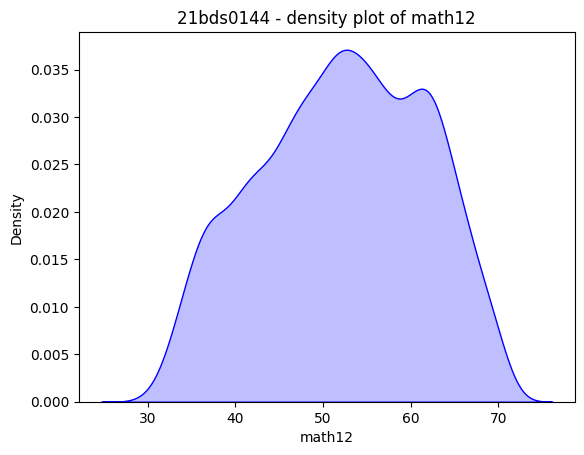

In [21]:
import seaborn as sns

sns.kdeplot(data['math12'], fill = True, color = 'blue')
plt.title("21bds0144 - density plot of math12")
plt.xlabel("math12")
plt.show()

##### 7. Box Plot (math12)

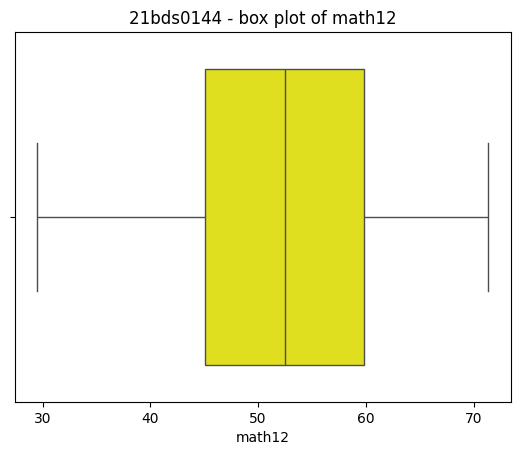

In [22]:
sns.boxplot(x = data['math12'], color = 'yellow')
plt.title("21bds0144 - box plot of math12")
plt.xlabel("math12")
plt.show()

##### 8. Bar Plot (Categorical Variable - female)

C:\Users\shrijeet\AppData\Local\Temp\ipykernel_9688\2186548687.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'female', data = data, palette = 'Set2')


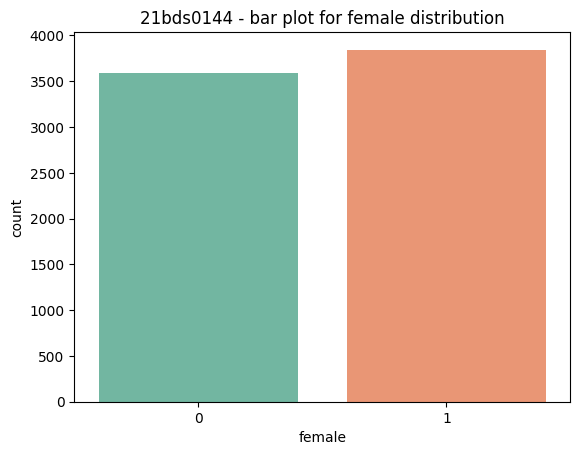

In [23]:
sns.countplot(x = 'female', data = data, palette = 'Set2')
plt.title("21bds0144 - bar plot for female distribution")
plt.xlabel("female")
plt.ylabel("count")
plt.show()

##### 9. Pie Chart (Categorical Variable - cathhs)

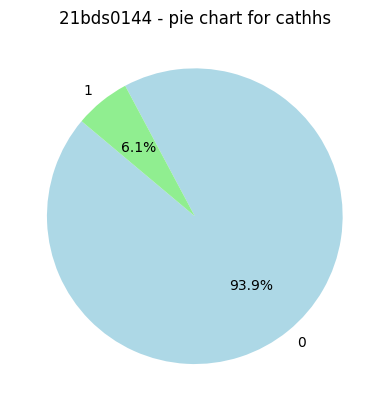

In [24]:
cathhs_counts = data['cathhs'].value_counts()
plt.pie(cathhs_counts, labels = cathhs_counts.index, autopct = '%1.1f%%',
        startangle = 140, colors = ['lightblue', 'lightgreen'])
plt.title("21bds0144 - pie chart for cathhs")
plt.show()

##### 10. Dot Plot (math12)

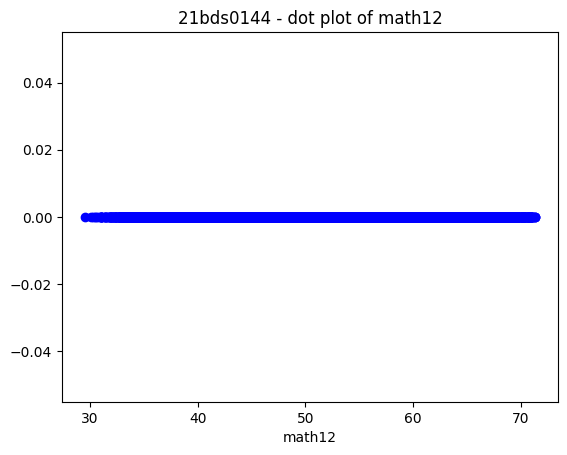

In [25]:
plt.plot(data['math12'], np.zeros_like(data['math12']), 'o', color = 'blue')
plt.title("21bds0144 - dot plot of math12")
plt.xlabel("math12")
plt.show()

##### Bivariate Analysis <br> 1. Contingency Table (Categorical Variables - female and cathhs)

In [26]:
contingency_table = pd.crosstab(data['female'], data['cathhs'])
print(contingency_table)

cathhs     0    1
female           
0       3341  245
1       3637  207


##### 2. Categorical vs Categorical Plots

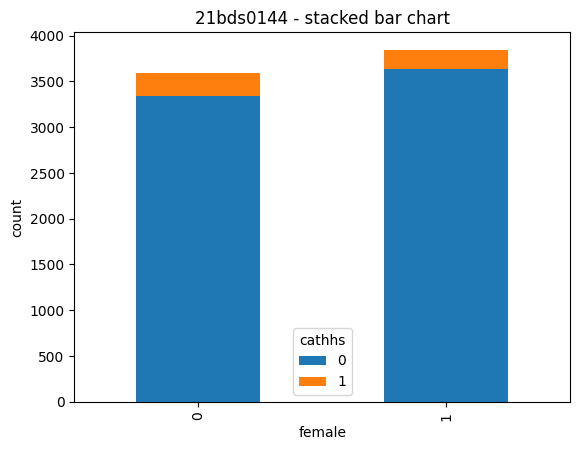

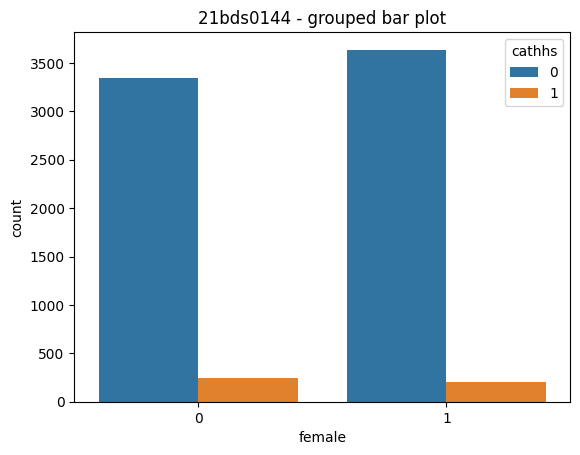

In [27]:
stacked_bar = contingency_table.plot(kind = 'bar', stacked = True)
plt.title('21bds0144 - stacked bar chart')
plt.ylabel('count')
plt.show()

sns.countplot(x = 'female', hue = 'cathhs', data = data, dodge = True)
plt.title('21bds0144 - grouped bar plot')
plt.show()

##### 3. Quantitative vs Quantitative Plots

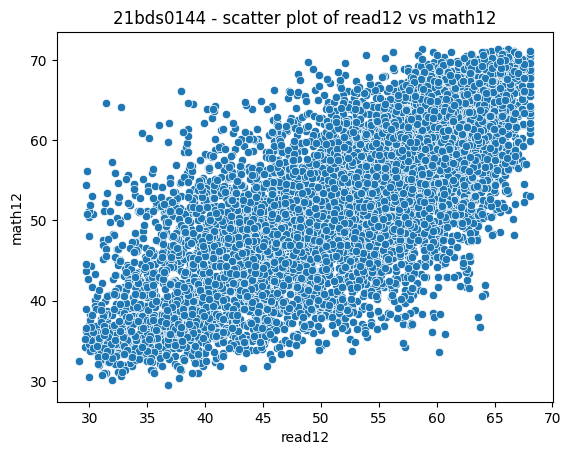

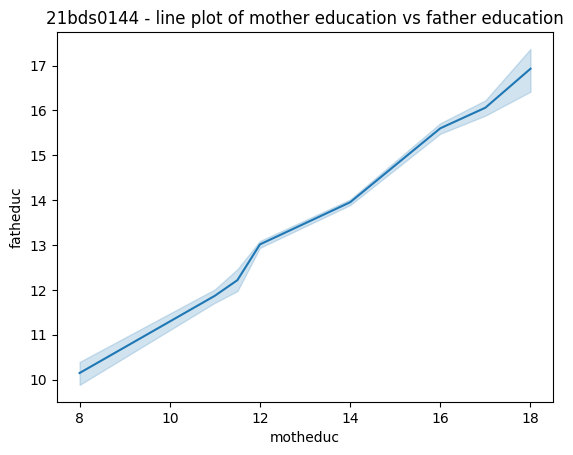

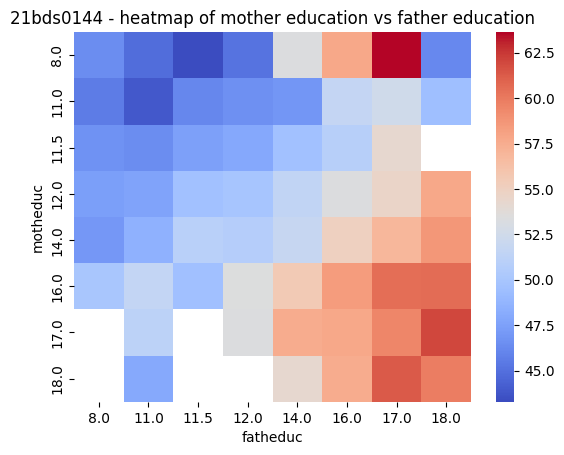

In [28]:
sns.scatterplot(x = 'read12', y = 'math12', data = data)
plt.title('21bds0144 - scatter plot of read12 vs math12')
plt.show()

sns.lineplot(x = 'motheduc', y = 'fatheduc', data = data)
plt.title('21bds0144 - line plot of mother education vs father education')
plt.show()

heatmap_data = data.pivot_table(values = 'math12', index = 'motheduc',
                                columns = 'fatheduc', aggfunc = 'mean')
sns.heatmap(heatmap_data, cmap = 'coolwarm')
plt.title('21bds0144 - heatmap of mother education vs father education')
plt.show()

##### 4. Categorical vs Quantitative Plots

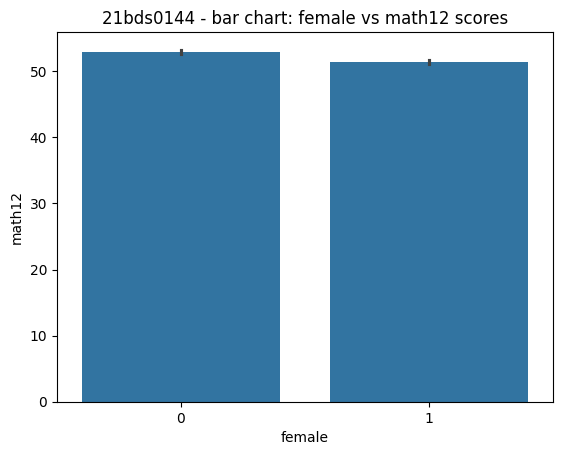

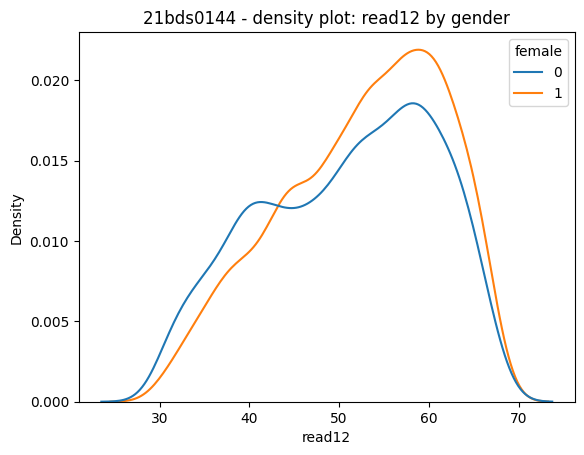

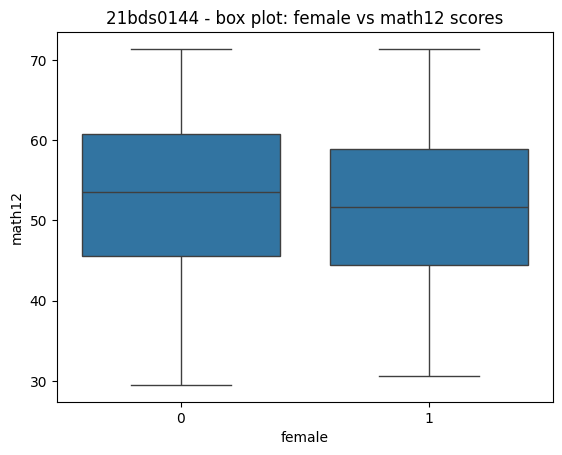

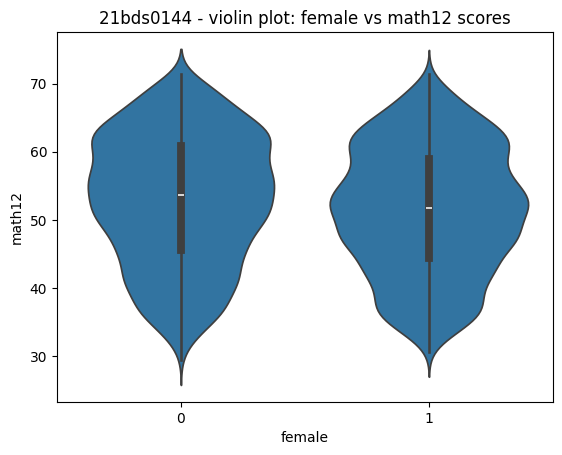

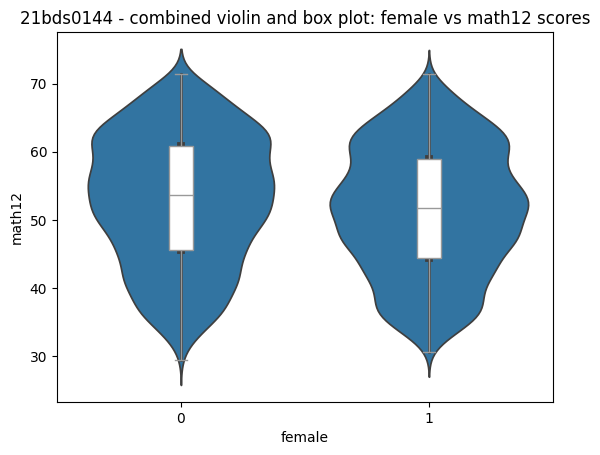

In [29]:
sns.barplot(x = 'female', y = 'math12', data = data)
plt.title('21bds0144 - bar chart: female vs math12 scores')
plt.show()

# converting 'read12' to numeric, coercing errors
data['read12'] = pd.to_numeric(data['read12'], errors='coerce')

sns.kdeplot(x = data['read12'], hue = data['female'])
plt.title('21bds0144 - density plot: read12 by gender')
plt.show()

sns.boxplot(x = 'female', y = 'math12', data = data)
plt.title('21bds0144 - box plot: female vs math12 scores')
plt.show()

sns.violinplot(x = 'female', y = 'math12', data = data)
plt.title('21bds0144 - violin plot: female vs math12 scores')
plt.show()

sns.violinplot(x = 'female', y = 'math12', data = data)
sns.boxplot(x = 'female', y = 'math12', data = data, color = 'w', width = 0.1)
plt.title('21bds0144 - combined violin and box plot: female vs math12 scores')
plt.show()

##### 5. Correlogram Matrix

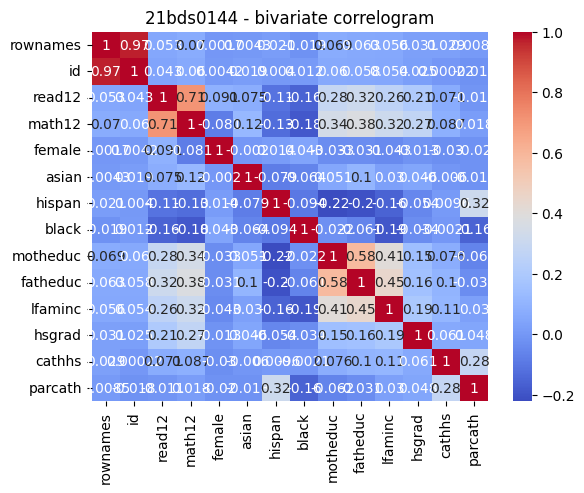

In [30]:
# only numeric data types
numeric_data = data.select_dtypes(include = [np.number])
corr = numeric_data.corr()

# using a heatmap
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title("21bds0144 - bivariate correlogram")
plt.show()

##### Multivariate Analysis <br> 1. Scatter Plot (3 Variables)

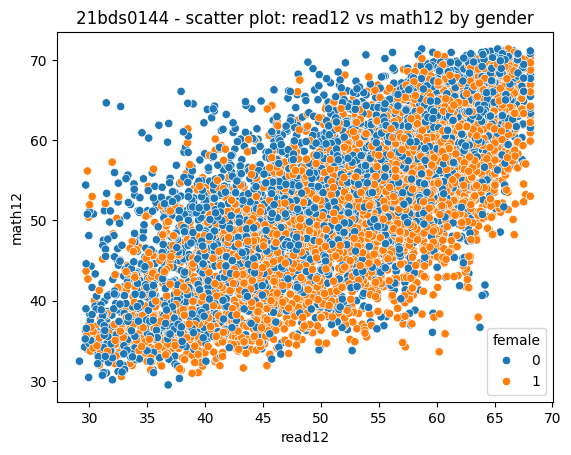

In [31]:
sns.scatterplot(x = 'read12', y = 'math12', hue = 'female', data = data)
plt.title('21bds0144 - scatter plot: read12 vs math12 by gender')
plt.show()

##### 2. Scatter Plot (4 Variables)

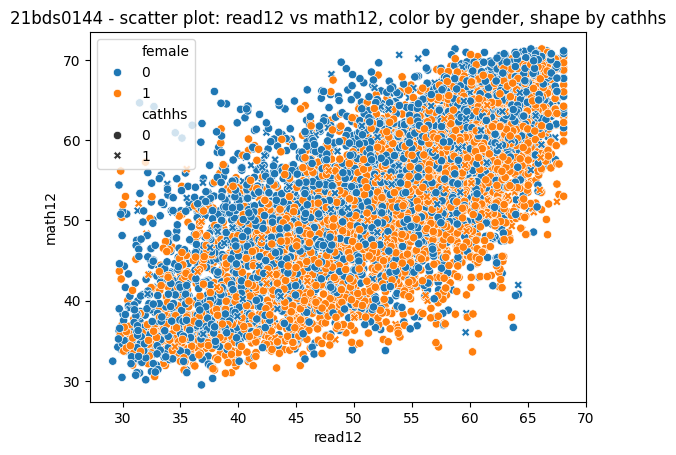

In [32]:
sns.scatterplot(x = 'read12', y = 'math12', hue = 'female', style = 'cathhs', data = data)
plt.title('21bds0144 - scatter plot: read12 vs math12, color by gender, shape by cathhs')
plt.show()

##### 3. Bubble Plot

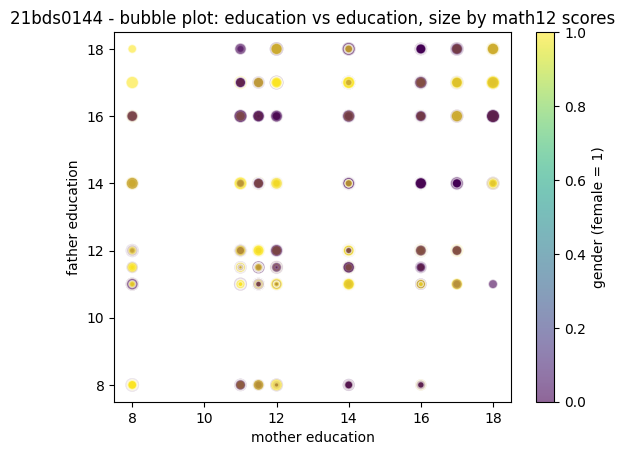

In [33]:
# scaling 'math12' scores for bubble size
size_scale = 100 * (data['math12'] - data['math12'].min()) / (data['math12'].max() - data['math12'].min())

scatter = plt.scatter('motheduc', 'fatheduc', s = size_scale,
                      c = 'female', cmap = 'viridis', alpha = 0.6, data = data, edgecolors = 'w')

# adding a color bar for the 'female' column if it's continuous or legend if categorical
plt.colorbar(scatter, label = 'gender (female = 1)')

plt.xlabel('mother education')
plt.ylabel('father education')
plt.title('21bds0144 - bubble plot: education vs education, size by math12 scores')
plt.show()

##### 4. Faceted Subgraphs

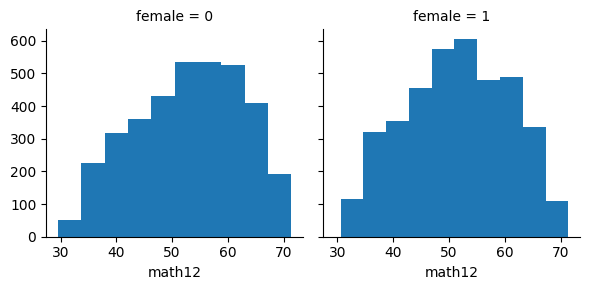

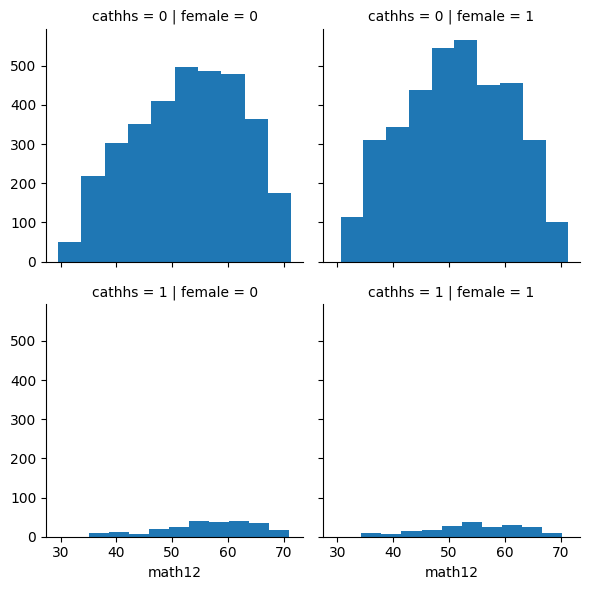

In [34]:
# (a) facet wrap
g = sns.FacetGrid(data, col = 'female', height = 3)
g.map(plt.hist, 'math12')
plt.show()

# (b) facet grid
g = sns.FacetGrid(data, col = 'female', row = 'cathhs', height = 3)
g.map(plt.hist, 'math12')
plt.show()

##### 5. Pairs Plot

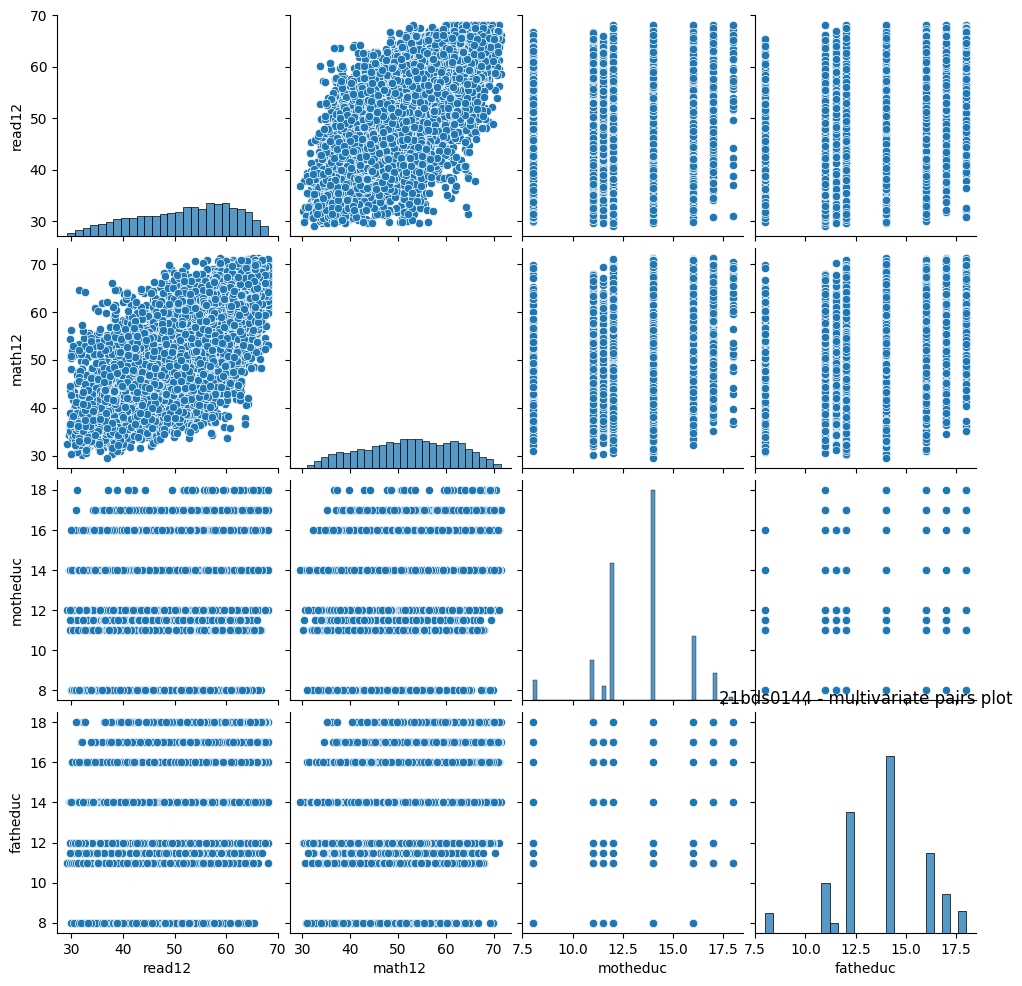

In [35]:
sns.pairplot(data[['read12', 'math12', 'motheduc', 'fatheduc']])
plt.title("21bds0144 - multivariate pairs plot")
plt.show()

##### 6. Parallel Coordinates Plot

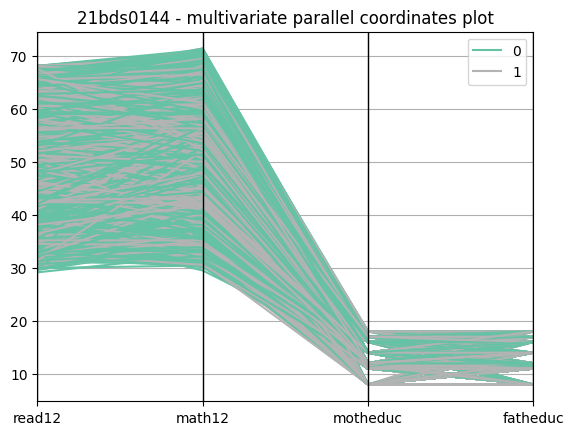

In [36]:
from pandas.plotting import parallel_coordinates

data['female'] = data['female'].astype(str)  # converting to string for plotting
parallel_coordinates(data[['read12', 'math12', 'motheduc', 'fatheduc', 'female']],
                     'female', colormap = plt.get_cmap("Set2"))
plt.title("21bds0144 - multivariate parallel coordinates plot")
plt.show()

##### **TIMESERIES:** <BR> There are no explicit date or time columns in the dataset that would typically be required for time series analysis, such as timestamps, years, months, etc. The dataset appears to focus on educational and demographic data collected at a single point in time or aggregated over an unspecified period, without any temporal sequencing evident from the column names.

##### **Module 4**